<a href="https://colab.research.google.com/github/jdr98/TP1/blob/master/TP_1_Jorge2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finger 1

In [0]:
## Imports

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Cargo data, reviso, etc
train = pd.read_csv('train.csv')
train

FileNotFoundError: ignored

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [0]:
test = pd.read_csv('test.csv')
test

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [0]:
test.info()

In [0]:
ss = pd.read_csv('sample_submission.csv')
ss

In [0]:
ss.info()

In [0]:
train.describe(include='all')#;

In [0]:
test.describe(include='all')

In [0]:
train.duplicated().sum()

In [0]:
test.duplicated().sum()

In [0]:
### Train. Distribución 

In [0]:
# Creo columna con longitud de cada texto
train['largo'] = train['text'].str.len()
# chequeo: train.sort_values(by='largo')

# Agrupo por target
grouped = train.groupby(['target'])
# chequeo estadísticos: grouped.agg({'largo':'describe'}) 

# Grafico
fig = plt.figure()

ax1 = fig.add_subplot(221)
grouped['largo'].plot(
    kind='hist', title='Histograma', legend=True, xlim=(0, 160), figsize=(12,12))
ax1.set_xlabel('largo')

ax2 = fig.add_subplot(222)
grouped['largo'].plot(
    x='largo', kind='kde', title='Densidad', legend=True, xlim=(0, 160), figsize=(12,12))
ax2.set_xlabel('largo')

ax3 = fig.add_subplot(223)
train.boxplot(
    by='target', column='largo', ax=ax3, figsize=(12,12))
ax3.set_title('Boxplot'), ax3.set_xlabel('target'), ax3.set_ylabel('largo')

ax4 = fig.add_subplot(224)
sns.stripplot(x='target',y='largo', data=train, alpha=0.25, jitter=0.3)#,figsize=(12,8));
ax4.set_title('Scatter con jitter')

fig.suptitle('TRAIN', fontsize=16)
#plt.show()

In [0]:
### TEST. Distribución

In [0]:
# Creo columna con longitud de cada texto
test['largo'] = test['text'].str.len()
# chequeo: test.sort_values(by='largo')

# Agrupo por target
#grouped = test.groupby(['target'])
# chequeo estadísticos: grouped.agg({'largo':'describe'}) 

# Grafico
fig = plt.figure()

ax1 = fig.add_subplot(221)
test['largo'].plot(
    kind='hist', title='Histograma', legend=True, xlim=(0, 160), figsize=(12,12))
ax1.set_xlabel('largo')

ax2 = fig.add_subplot(222)
test['largo'].plot(
    x='largo', kind='kde', title='Densidad', legend=True, xlim=(0, 160), figsize=(12,12))
ax2.set_xlabel('largo')

ax3 = fig.add_subplot(223)
test.boxplot(
    column='largo', ax=ax3, figsize=(12,12))
ax3.set_title('Boxplot'), ax3.set_xlabel('target'), ax3.set_ylabel('largo')

ax4 = fig.add_subplot(224)
sns.stripplot(x=[0]*len(test), y='largo', data=test, alpha=0.25, jitter=0.1)#,figsize=(12,8));
ax4.set_title('Scatter con jitter')

fig.suptitle('TEST', fontsize=16)
#plt.show()

In [0]:
## TRAIN. Keyword vs target

In [0]:
train

In [0]:
#train['keyword'].fillna('', inplace=True)

Contamos y mostramos las palabras clave mas utilizadas en los tweets


In [0]:
train['keyword'].value_counts()

fatalities               45
armageddon               42
deluge                   42
body%20bags              41
harm                     41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

Contamos y mostramos desde que locaciones fueron generados esos tweets, vemos que los primeros corresponde a USA, NY y United States, seguidos por Lodres u Canadá, notamos que la información no discrimina por pais, ciudad, capitales, etc. por lo tanto habría que ver como segmentar esta información para obtener mejores resultados de consultas.

In [0]:
# [J] count de text
train['location'].value_counts()

USA                           104
New York                       71
United States                  50
London                         45
Canada                         29
                             ... 
Dorset, United Kingdom          1
Campinas Sp                     1
Wyoming, MI (Grand Rapids)      1
Suitland                        1
Saipan, CNMI                    1
Name: location, Length: 3341, dtype: int64

En esta sección mostramos los textos más tweeteados en la red social

In [0]:
# [J] contar tweet mas compartidos
tweet_per_text = train['text'].value_counts()
tweet_per_text.head()

11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...        10
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam                      6
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'                               6
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_     6
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives                                                                                  5
Name: text, dtype: int64

In [0]:
# [J] contar tweets por keyword
tweet_per_kw = train['keyword'].value_counts()
tweet_per_kw

fatalities               45
armageddon               42
deluge                   42
body%20bags              41
harm                     41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

Respecto a los tweets si son reales [1] o no [0], realizamos un conteo de los mismos y los mostramos.

In [0]:
# [J] cuantos tweets son reales (1) y cuantos NO lo son (0)
tweet_real_or_not = train['target'].value_counts()
tweet_real_or_not

0    4342
1    3271
Name: target, dtype: int64

Creamos una visualización de los la cantidad de tweets sobre desastres reales [1] respecto a los que no lo son [0]. La visualización es para mostrar con más énfasis que hay más tweets falsos que reales respecto a desastres naturales.

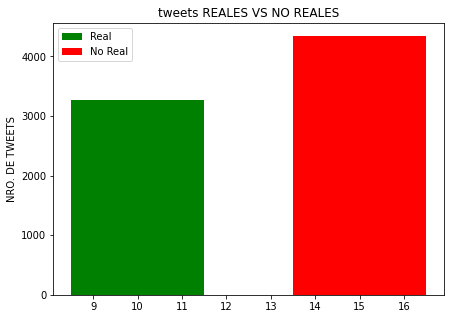

In [0]:
# DV TWEET TARGET REAL [1] O NO [0] 
Real = train[train['target'] == 1].shape[0]
Not = train[train['target'] == 0].shape[0]
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,Real,3, label="Real", color='green')
plt.bar(15,Not,3, label="No Real", color='red')
plt.legend()
plt.ylabel('NRO. DE TWEETS')
plt.title('tweets REALES VS NO REALES')
plt.show()

Directamente aplicamos una limpieza de cualquier ceda que tenga datos nulos y eliminamos esas celdas por completo, nos quedamos con 5080 celdas respecto al  inicio que habían 7613.

In [0]:
# [J] Limpiar NaN del data frame
train.dropna(inplace = True)
print(len(train))

5080


Sacamos la columna inicial y asignamos como índice a la columna Id, correspondiente a cada tweet.

In [0]:
# [J] Defino Id como indice
df_id = train.set_index(['id'])
df_id

,keyword,location,text,target
id,,,,
48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...
10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0
10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0
10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0


Renombramos a las columnas:
  - TARGET --> (NOT)REAL ([1] REAL, [0] NO REAL)
  - TEXT   --> Content_text, contenido de los tweets.

In [0]:
# [J] Renombro columna target y text
col_rename={'target':'(NOT)real', 'text':'content_tweet'}
df_renom_col = train.rename(columns = col_rename)
df_renom_col

,id,keyword,location,content_tweet,(NOT)real
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...,...
7575,10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0
7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0


In [0]:
# Creo columna con longitud de cada texto
# chequeo: train.sort_values(by='largo')

# Agrupo por target
grouped = train.groupby(['target'])
# chequeo estadísticos: grouped.agg({'largo':'describe'}) 
grouped.groups

{0: Int64Index([  15,   16,   17,   18,   19,   20,   21,   22,   23,   24,
             ...
             7576, 7577, 7578, 7579, 7580, 7581, 7582, 7584, 7587, 7593],
            dtype='int64', length=4342),
 1: Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             7603, 7604, 7605, 7606, 7607, 7608, 7609, 7610, 7611, 7612],
            dtype='int64', length=3271)}

In [0]:
# genero matriz para plot barras horiz con fillna=0
g_unstack = grouped['keyword'].value_counts().unstack().T.fillna(0)
g_unstack['0+1'] = g_unstack[0] + g_unstack[1]
g_unstack.sort_values(by='0+1')

target,0,1,0+1
keyword,,,
radiation%20emergency,4.0,5.0,9.0
inundation,8.0,2.0,10.0
threat,9.0,2.0,11.0
epicentre,11.0,1.0,12.0
forest%20fire,4.0,15.0,19.0
...,...,...,...
sinking,33.0,8.0,41.0
body%20bags,40.0,1.0,41.0
armageddon,37.0,5.0,42.0


<BarContainer object of 221 artists>

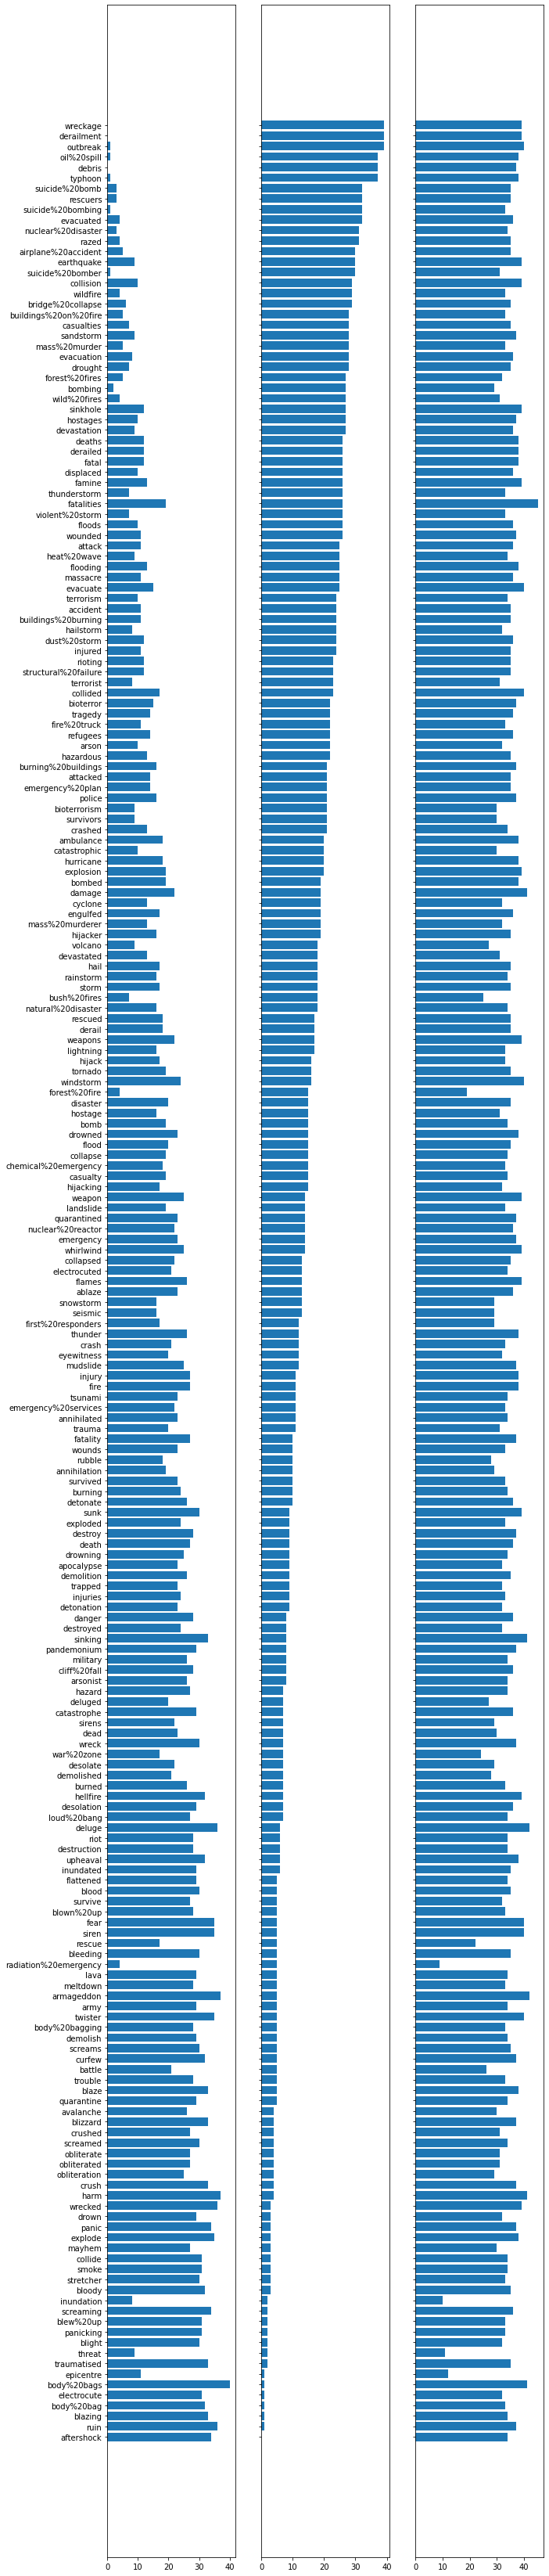

In [0]:
# Grafico
g_sort_1 = g_unstack.sort_values(by=1)

fig = plt.figure(figsize=(10,60))

ax1 = fig.add_subplot(131)
ax1.barh(g_sort_1.index, g_sort_1[0])

ax2 = fig.add_subplot(132)
ax2.barh(g_sort_1.index, g_sort_1[1], tick_label='')
#ax2.set_ylabel('')

ax3 = fig.add_subplot(133)
ax3.barh(g_sort_1.index, g_sort_1['0+1'], tick_label='')

#, interpolation='nearest', cmap=plt.cm.ocean)(kind='bar', figsize=(24, 6))
#ax2 = fig.add_subplot(212)
#train.loc[train['target']==1, 'keyword'].value_counts().sort_values().plot(kind='bar', figsize=(24, 6))

#sns.countplot(train['keyword'])
# grouped['keyword'].plot(
#    kind='hist', title='Histograma', legend=True, figsize=(12,12))
#ax1.set_xlabel('largo')

In [0]:
# cociente 1/0
#g_sort_1['ratio'] = g_sort_1[1] / g_sort_1[0]
g_sort_1['delta/suma'] = (g_sort_1[1] - g_sort_1[0]) / (g_sort_1[1] + g_sort_1[0])
#g_sort_1
#train['keyword'].isin(train['text']).value_counts()
#train
g_sort_1

target,0,1,0+1,delta/suma
keyword,,,,
aftershock,34.0,0.0,34.0,-1.000000
ruin,36.0,1.0,37.0,-0.945946
blazing,33.0,1.0,34.0,-0.941176
body%20bag,32.0,1.0,33.0,-0.939394
electrocute,31.0,1.0,32.0,-0.937500
...,...,...,...,...
debris,0.0,37.0,37.0,1.000000
oil%20spill,1.0,37.0,38.0,0.947368
outbreak,1.0,39.0,40.0,0.950000


In [0]:
# Grafico
#g_sort_ds = g_sort_1.sort_values(by='delta/suma')

fig = plt.figure(figsize=(10,50))

ax1 = fig.add_subplot(121)
ax1.barh(g_sort_ds.index, g_sort_ds['delta/suma'])
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.barh(g_sort_1.index, g_sort_1['0+1'], tick_label='')
ax2.grid()

In [0]:
ax2 = fig.add_subplot(222)
grouped['largo'].plot(
    x='largo', kind='kde', title='Densidad', legend=True, xlim=(0, 160), figsize=(12,12))
ax2.set_xlabel('largo')

ax3 = fig.add_subplot(223)
train.boxplot(
    by='target', column='largo', ax=ax3, figsize=(12,12))
ax3.set_title('Boxplot'), ax3.set_xlabel('target'), ax3.set_ylabel('largo')

ax4 = fig.add_subplot(224)
sns.stripplot(x='target',y='largo', data=train, alpha=0.25, jitter=0.3)#,figsize=(12,8));
ax4.set_title('Scatter con jitter')

fig.suptitle('TRAIN', fontsize=16)
#plt.show()